# LSEG

# Required Code


In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 2.6 MB/s eta 0:00:00


In [3]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.1 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def plot_model_evaluation(y_test, y_pred):
    residuals = y_test - y_pred

    # Residuals vs Predictions Plot

    residuals = y_test - y_pred
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='r', linestyle='--')  # Add horizontal line at 0
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.show()

    # Actual vs Predicted Plot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    # Quantile-Quantile Plot (Q-Q Plot)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    # Error Distribution Histogram
    plt.figure(figsize=(6, 6))
    sns.histplot(residuals, kde=True)
    plt.title('Error Distribution Histogram')
    plt.xlabel('Residuals')
    plt.show()

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Modelling

In [52]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Pre-processed /lseg_total.csv')
df = df.drop('Unnamed: 0', axis=1) #dropping the past index
df.head(5)

,Instrument,Country,TRBC Industry Group Name,Currency,Revenue,Gross Profit,EBIT,EBITDA,Total Assets,Total Liabilities,...,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP,sentiment_score,esg_classification_score,fls_classification_score,sentiment_numerical,esg_numerical,fls_numerical
0,LSEG.L,United Kingdom,Investment Banking & Investment Services,GBP,7.743000e+09,6.679000e+09,1.670000e+09,3.540000e+09,8.351560e+11,8.070050e+11,...,158.142791,-1.112864e+11,0.811302,21.053388,0.997494,0.998766,-0.085427,1.0,4.0,-7.322579
1,LSEG.L,United Kingdom,Investment Banking & Investment Services,GBP,7.743000e+09,6.679000e+09,1.670000e+09,3.540000e+09,8.351560e+11,8.070050e+11,...,158.142791,-1.112864e+11,0.811302,21.053388,0.997503,0.998766,-0.085427,1.0,4.0,-7.322579
2,LSEG.L,United Kingdom,Investment Banking & Investment Services,GBP,6.535000e+09,5.676000e+09,1.406000e+09,2.941000e+09,7.871090e+11,7.615900e+11,...,186.481994,-3.856365e+10,0.727065,22.384975,0.999286,0.926132,0.447773,1.0,4.0,-0.819062
3,LSEG.L,United Kingdom,Investment Banking & Investment Services,GBP,6.535000e+09,5.676000e+09,1.406000e+09,2.941000e+09,7.871090e+11,7.615900e+11,...,186.481994,-3.856365e+10,0.727065,22.384975,0.999286,0.926132,0.447773,1.0,4.0,-0.819062
4,LSEG.L,United Kingdom,Investment Banking & Investment Services,GBP,6.535000e+09,5.676000e+09,1.406000e+09,2.941000e+09,7.871090e+11,7.615900e+11,...,186.481994,-3.856365e+10,0.727065,22.384975,0.999282,0.926132,0.447773,1.0,4.0,-0.819063


In [53]:
df.shape

(321, 38)

In [54]:
df.isna().sum()

Instrument                                                      0
Country                                                         0
TRBC Industry Group Name                                        0
Currency                                                        0
Revenue                                                         0
Gross Profit                                                    0
EBIT                                                            0
EBITDA                                                          0
Total Assets                                                    0
Total Liabilities                                               0
Enterprise Value                                                0
Free Cash Flow                                                  0
PE Ratio                                                        0
Dividend Yield                                                  0
Net Profit Margin pct                                           0
Current Ra

# Splitting in X and Y

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Separate input features and target variable
X = df.drop(['Forward Enterprise Value To EBITDA (Daily Time Series Ratio)', 'Forward P/E (Daily Time Series Ratio)'], axis=1)  # drop the target variable and the date from the input features
y = df['Forward Enterprise Value To EBITDA (Daily Time Series Ratio)']  # we will predict the ev/ebitda

## Split in train and test

In [56]:
X_test = df[df['Instrument'] == 'LSEG.L']
y_test = X_test['Forward Enterprise Value To EBITDA (Daily Time Series Ratio)']

In [57]:
import numpy as np

# Align the number of samples in X and y
n_samples = min(X.shape[0], y.shape[0])
X = X[:n_samples]
y = y[:n_samples]

# Verify the updated shapes
print(X.shape)
print(y.shape)

(321, 36)
(321,)


Encoding now to keep the "translation" for easier interpretation

In [58]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the specified columns and store the encoded values in new columns
X_test['Instrument_encoded'] = encoder.fit_transform(X_test['Instrument'])
X_test['Country_encoded'] = encoder.fit_transform(X_test['Country'])
X_test['TRBC_Industry_encoded'] = encoder.fit_transform(X_test['TRBC Industry Group Name'])
X_test['Currency_encoded'] = encoder.fit_transform(X_test['Currency'])


# Encode the specified columns and store the encoded values in new columns
X['Instrument_encoded'] = encoder.fit_transform(X['Instrument'])
X['Country_encoded'] = encoder.fit_transform(X['Country'])
X['TRBC_Industry_encoded'] = encoder.fit_transform(X['TRBC Industry Group Name'])
X['Currency_encoded'] = encoder.fit_transform(X['Currency'])
#+8


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [59]:
# Specify the order of columns
new_column_order = ['Instrument_encoded', 'Country_encoded', 'TRBC_Industry_encoded',
       'Currency_encoded','Year', 'Month',
       'Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets',
       'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio',
       'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio',
       'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'GDP',
       'Stock traded pct GDP', 'Inflation pct', 'Unemployment Rate pct',
       'Government Debt pct GDP', 'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP', 'sentiment_score',
       'esg_classification_score', 'fls_classification_score',
       'sentiment_numerical', 'esg_numerical', 'fls_numerical']

# Reindex the DataFrame with the new column order
X_test_encoded = X_test.reindex(columns=new_column_order)
X_encoded = X.reindex(columns=new_column_order)

In [60]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the XGBRegressor model
xgb_model = XGBRegressor()
# Fit the XGBRegressor model
xgb_model.fit(X_encoded, y)

# Predict with the XGBRegressor model
y_pred_xgb = xgb_model.predict(X_test_encoded)

# Calculate mean squared error (MSE) for XGBRegressor
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("The mean squared error (MSE) on test set (XGBRegressor): {:.4f}".format(mse_xgb))

# Calculate R^2 score for XGBRegressor
r2_xgb = r2_score(y_test, y_pred_xgb)
print("The R^2 score on the test set (XGBRegressor): {:.4f}".format(r2_xgb))

The mean squared error (MSE) on test set (XGBRegressor): 0.1693
The R^2 score on the test set (XGBRegressor): 0.9796


# The Baseline Valuation: testing the models

## Adaboost

In [15]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost.fit(X_encoded, y)
y_pred_adaboost = adaboost.predict(X_test_encoded)

# Compute MSE
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
print("The mean squared error (MSE) on test set (AdaBoostRegressor): {:.4f}".format(mse_adaboost))

# Compute RMSE
rmse_adaboost = sqrt(mse_adaboost)
print("The root mean squared error (RMSE) on test set (AdaBoostRegressor): {:.4f}".format(rmse_adaboost))

# Compute R^2 Score
r2_adaboost = r2_score(y_test, y_pred_adaboost)
print("The R^2 score on the test set (AdaBoostRegressor): {:.4f}".format(r2_adaboost))

The mean squared error (MSE) on test set (AdaBoostRegressor): 5.2906
The root mean squared error (RMSE) on test set (AdaBoostRegressor): 2.3001
The R^2 score on the test set (AdaBoostRegressor): 0.3614


### Model Evaluation Plots

- Residuals vs. Predictions Plot: This is a scatter plot of residuals (the difference between the actual and predicted values) against the predicted values. If your model is well-calibrated, the residuals should be randomly scattered around zero. Patterns in this plot can suggest that your model is struggling with certain areas of the feature space.

- Actual vs. Predicted Plot: This is a scatter plot of actual target values against predicted values. If your model is perfect, all points should lie along the diagonal line where actual value equals predicted value. Deviations from this line indicate areas where your model's predictions are inaccurate.

- Quantile-Quantile Plot (Q-Q Plot): This plot is used to check if the residuals follow a normal distribution. The residuals are plotted against a theoretical normal distribution in such a way that the points should form an approximate straight line. Deviations from this line may suggest a problem with the normality assumption.

- Error Distribution Histogram: A histogram or density plot of the residuals can show whether errors are normally distributed, which is an assumption of many regression models.

- Learning Curve: A learning curve shows model performance (typically, RMSE or another loss function) on the y-axis against the number of observations used for training on the x-axis. This can show whether your model might benefit from more data.


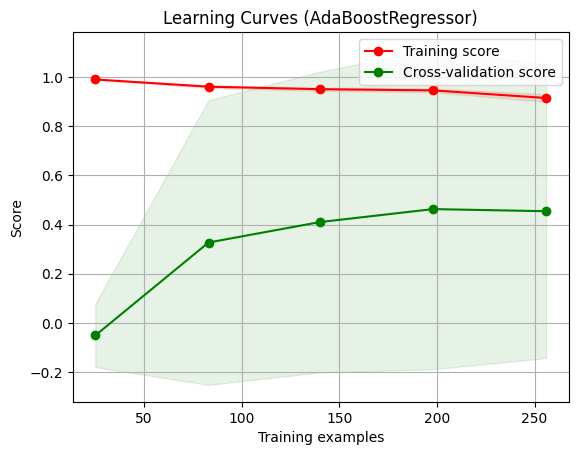

In [16]:
import numpy as np

# Assume we have our AdaBoostRegressor 'adaboost' and feature matrix X, and target vector y
X, y = np.array(X_encoded), np.array(y)
title = "Learning Curves (AdaBoostRegressor)"
plot_learning_curve(adaboost, title, X, y, cv=5, n_jobs=4)

plt.show()

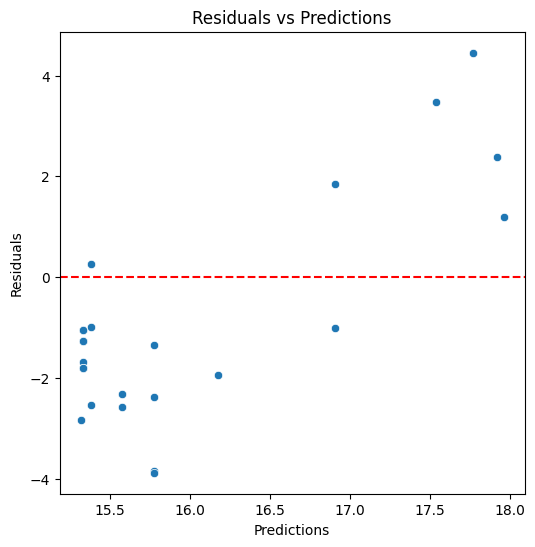

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Residuals vs. Predictions Plot:

residuals = y_test - y_pred_adaboost
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred_adaboost, y=residuals)
plt.axhline(0, color='r', linestyle='--')  # Add horizontal line at 0
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

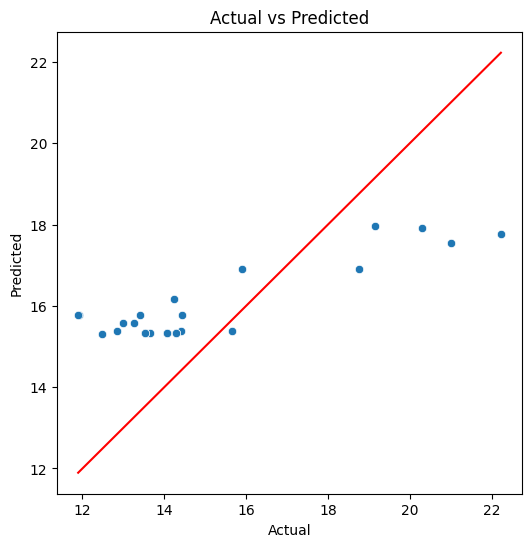

In [18]:
# actual vs predicted:

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_adaboost)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

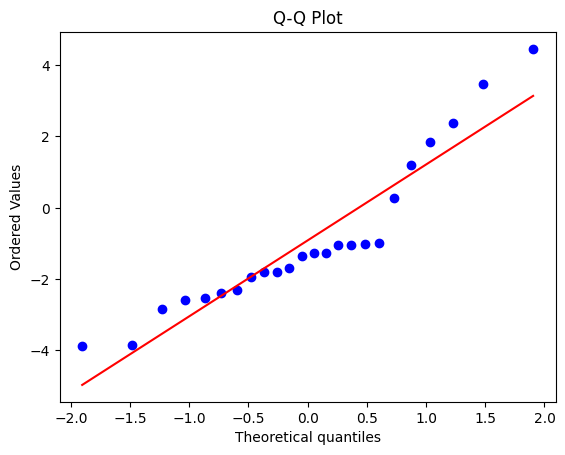

In [19]:
# Quantile-Quantile Plot (Q-Q Plot):

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

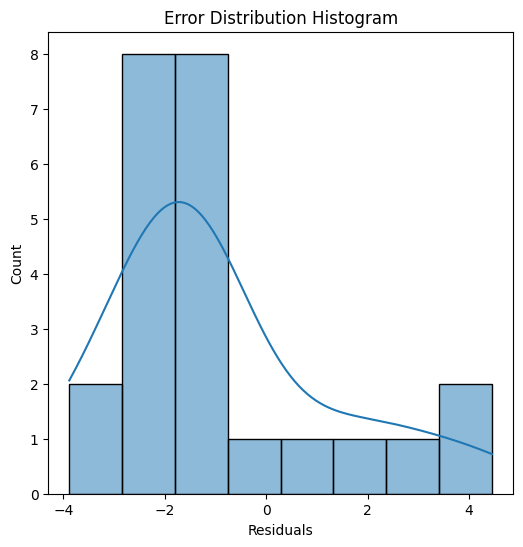

In [20]:
#Error Distribution Histogram:

plt.figure(figsize=(6, 6))
sns.histplot(residuals, kde=True)
plt.title('Error Distribution Histogram')
plt.xlabel('Residuals')
plt.show()

### Feature importance

In [21]:
X_encoded.columns

Index(['Instrument_encoded', 'Country_encoded', 'TRBC_Industry_encoded',
       'Currency_encoded', 'Year', 'Month', 'Revenue', 'Gross Profit', 'EBIT',
       'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value',
       'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct',
       'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct',
       'Outstanding Tot Shares', 'GDP', 'Stock traded pct GDP',
       'Inflation pct', 'Unemployment Rate pct', 'Government Debt pct GDP',
       'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP', 'sentiment_score',
       'esg_classification_score', 'fls_classification_score',
       'sentiment_numerical', 'esg_numerical', 'fls_numerical'],
      dtype='object')

In [22]:
import plotly.express as px

# fit model and get importance as before
model = AdaBoostRegressor()
model.fit(X_encoded, y)
importance = model.feature_importances_

# create dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_encoded.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'},
             category_orders={"Features": importance_df["Features"].tolist()}) # Ensure that the features are ordered based on their importance

fig.show()


In [23]:
import plotly.express as px

# fit model and get importance as before
model = AdaBoostRegressor()
model.fit(X_encoded, y)
importance = model.feature_importances_

# create dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_encoded.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'})
fig.show()

## Histogradient Boost


In [24]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Train the model
histgb = HistGradientBoostingRegressor()
histgb.fit(X_encoded, y)

# Make predictions on the test set
y_pred_histgb = histgb.predict(X_test_encoded)

# Calculate metrics
mse_histgb = mean_squared_error(y_test, y_pred_histgb)
rmse_histgb = sqrt(mse_histgb)
r2_histgb = r2_score(y_test, y_pred_histgb)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_histgb))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_histgb))
print("The R^2 score on the test set: {:.4f}".format(r2_histgb))

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



The mean squared error (MSE) on test set: 0.9041
The root mean squared error (RMSE) on test set: 0.9508
The R^2 score on the test set: 0.8909


### Model Evaluation

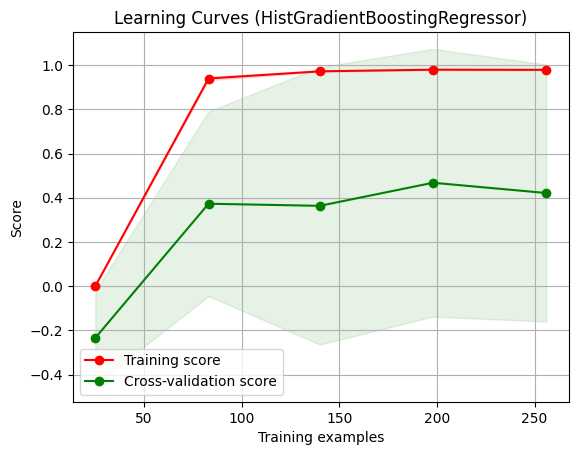

In [25]:
# Plot learning curve
plot_learning_curve(histgb, "Learning Curves (HistGradientBoostingRegressor)", X, y, cv=5, n_jobs=4)
plt.show()

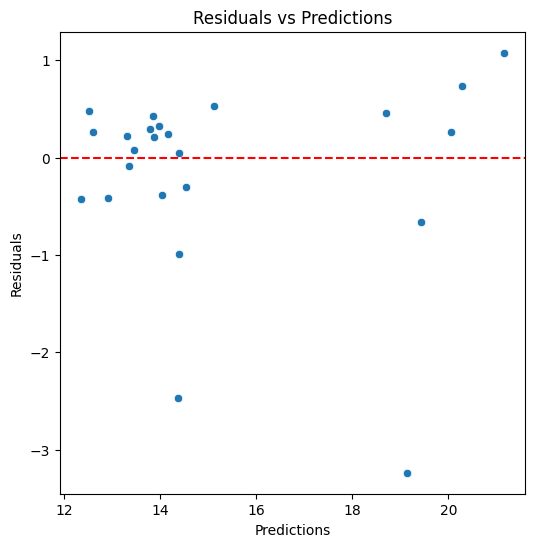

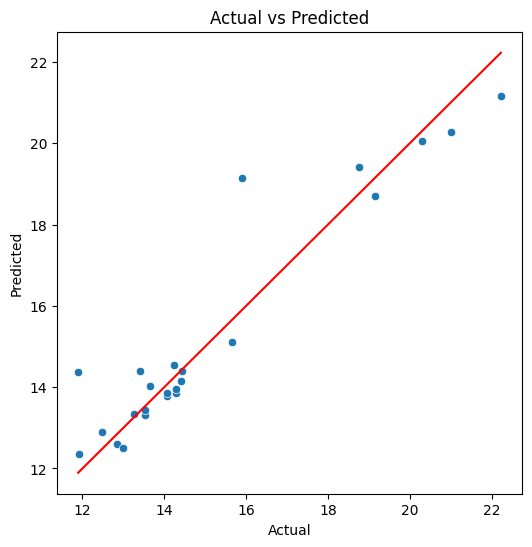

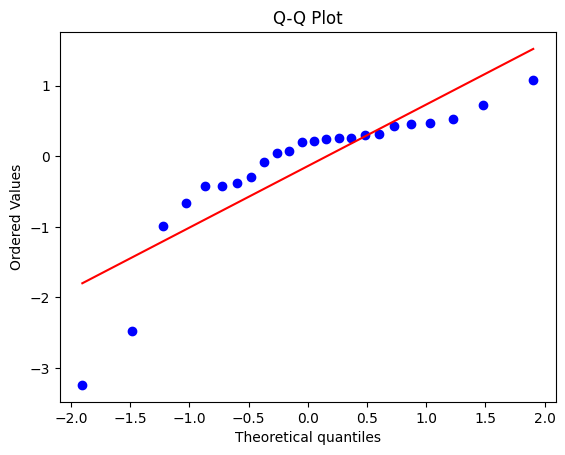

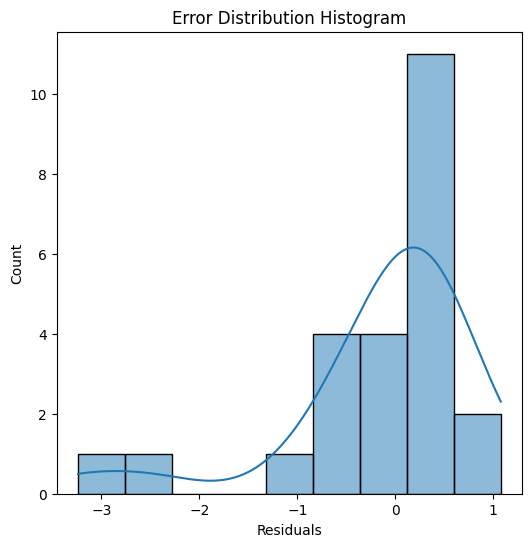

In [26]:
plot_model_evaluation(y_test, y_pred_histgb)

### Feature importance

In [27]:
from sklearn.inspection import permutation_importance

# fit the model
model = HistGradientBoostingRegressor()
model.fit(X_encoded, y)

# perform permutation importance
results = permutation_importance(model, X_test_encoded, y_test, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# create a dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_test_encoded.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'},
             category_orders={"Features": importance_df["Features"].tolist()})  # Ensure that the features are ordered based on their importance

fig.show()

## XGBRegressor

The mean squared error (MSE) on test set: 0.1693
The root mean squared error (RMSE) on test set: 0.4114
The R^2 score on the test set: 0.9796


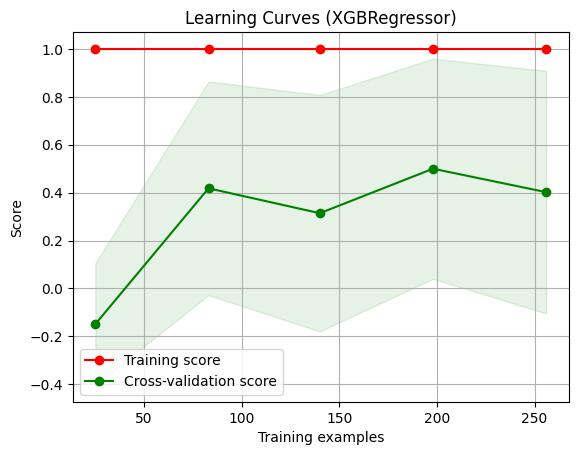

In [28]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Train the model
xgb_model = XGBRegressor()
xgb_model.fit(X_encoded, y)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_encoded)

# Calculate metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_xgb))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_xgb))
print("The R^2 score on the test set: {:.4f}".format(r2_xgb))

# Plot learning curve
plot_learning_curve(xgb_model, "Learning Curves (XGBRegressor)", X, y, cv=5, n_jobs=4)
plt.show()

### Model evaluation Plots

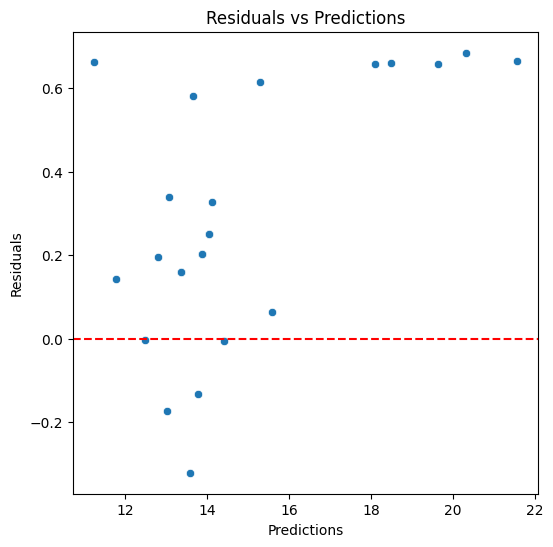

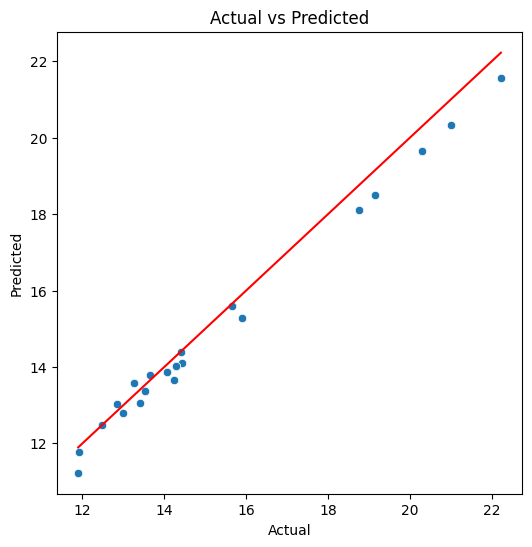

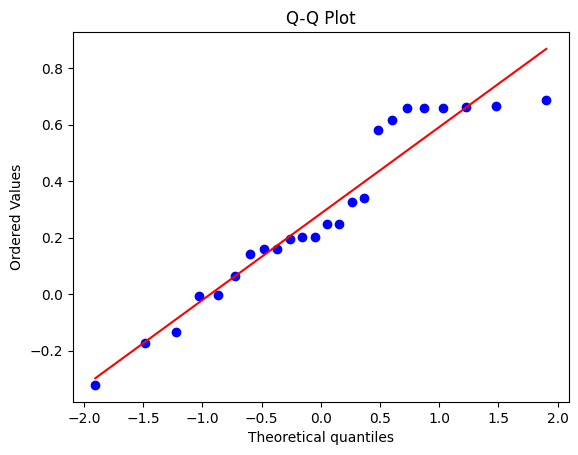

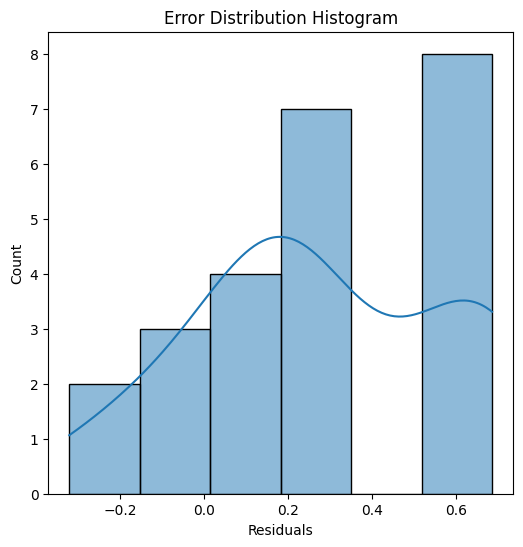

In [29]:
plot_model_evaluation(y_test, y_pred_xgb)

### Feature importance

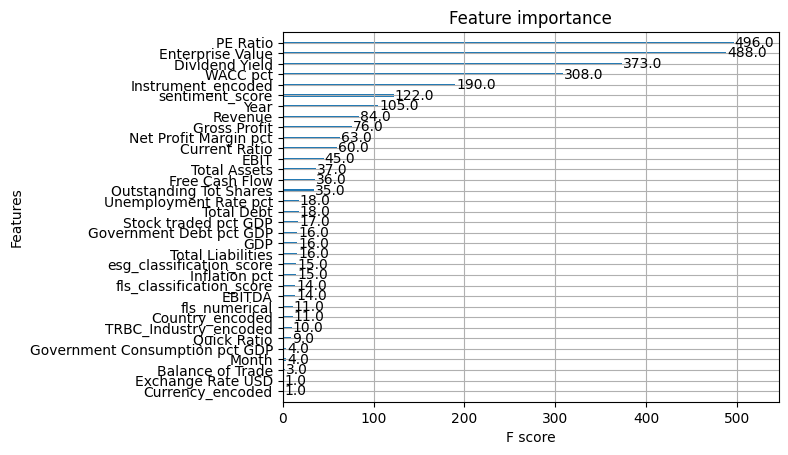

In [30]:
import matplotlib.pyplot as plt
import xgboost as xg

# Get feature importances
importances = xgb_model.feature_importances_

# Plot feature importances
xg.plot_importance(xgb_model)
plt.show()

why the differences=

- Metric Used: The plot_importance function in XGBoost uses a different default importance metric. While feature_importances_ uses the average gain of each feature when it is used in trees, plot_importance by default uses "weight", meaning the number of times a feature appears in a tree across all trees in the model. If you want to make the methods consistent, you can set the importance_type in plot_importance to "gain".

- Normalization: By default, feature_importances_ gives you the raw unnormalized values. However, the plot_importance function normalizes the importance values to sum up to 1. You can disable this by setting normalize=False.

In [31]:
import xgboost as xgb

# Train the model
model = xgb.XGBRegressor()
model.fit(X_encoded, y)

# Get feature importances
importance = model.feature_importances_

# create a dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_encoded.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'},
             category_orders={"Features": importance_df["Features"].tolist()})  # Ensure that the features are ordered based on their importance

fig.show()

In [32]:
from sklearn.model_selection import cross_val_score

# Instantiate the XGBRegressor model
xgb = XGBRegressor()

# Perform k-fold cross-validation
scores = cross_val_score(xgb, X_encoded, y, cv=10)

print("Cross-validated scores:", scores)

# Make cross-validated predictions
print("Average 5-Fold CV Score: {}".format(np.mean(scores)))

Cross-validated scores: [ 0.43316645  0.88792642  0.66036732  0.28074805  0.82806859  0.93519192
  0.69537857  0.9112309   0.59309109 -0.4250811 ]
Average 5-Fold CV Score: 0.5800088220491689


In [33]:
import shap

# create a SHAP explainer object
explainer = shap.Explainer(xgb_model)

# compute SHAP values for the first example in the test set
X_example = X_encoded.iloc[0:1]  # or any other specific instance we're interested in
shap_values = explainer.shap_values(X_example)

# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_example)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## LightGBM

The mean squared error (MSE) on test set: 1.0788
The root mean squared error (RMSE) on test set: 1.0386
The R^2 score on the test set: 0.8698


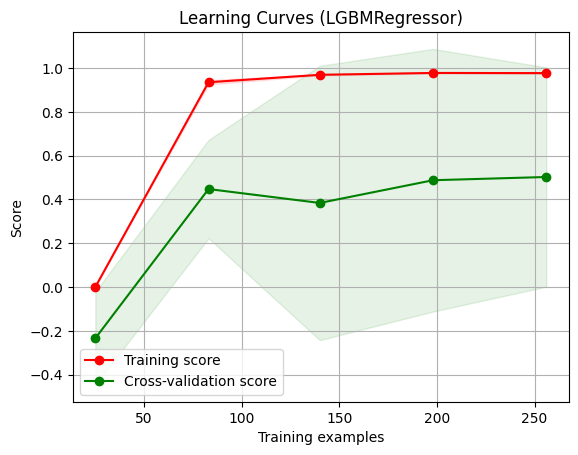

In [34]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming we have our training data in X_train, y_train and testing data in X_test, y_test

# Train the model
lgbm_model = LGBMRegressor(objective ='regression')  # using regression as our objective function
lgbm_model.fit(X_encoded, y)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test_encoded)

# Calculate metrics
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_lgbm))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_lgbm))
print("The R^2 score on the test set: {:.4f}".format(r2_lgbm))

# Plot learning curve
plot_learning_curve(lgbm_model, "Learning Curves (LGBMRegressor)", X, y, cv=5, n_jobs=4)
plt.show()

### Model evaluation plots

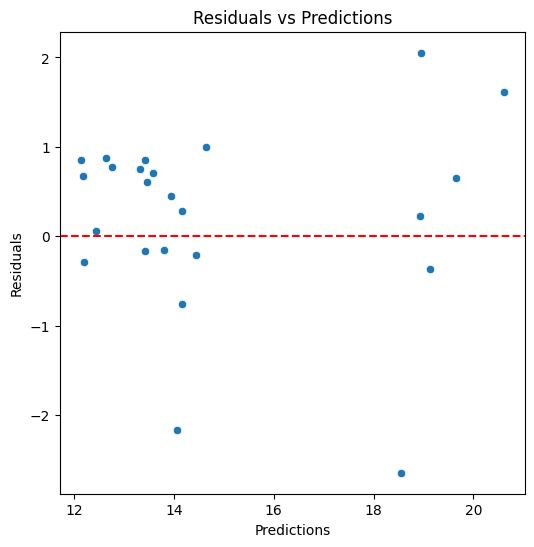

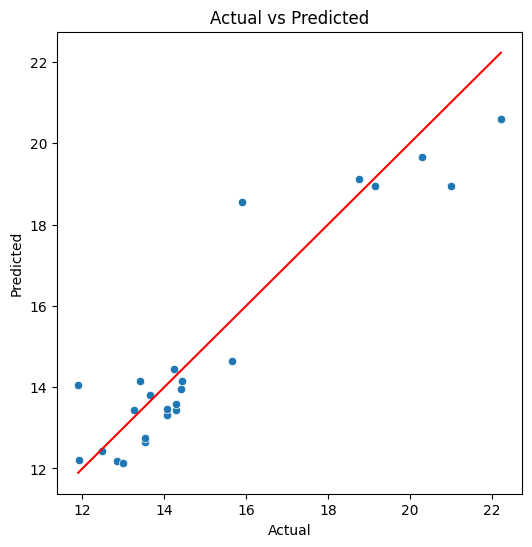

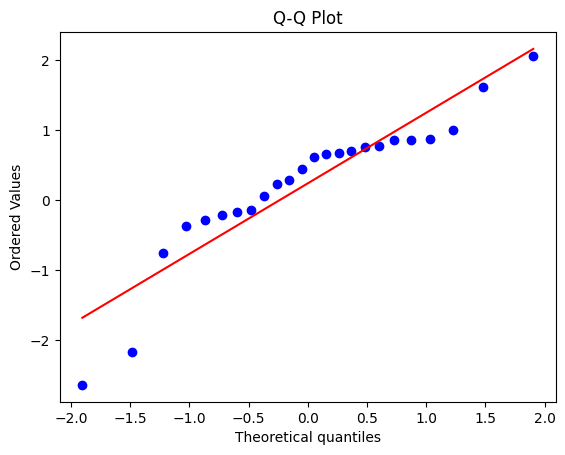

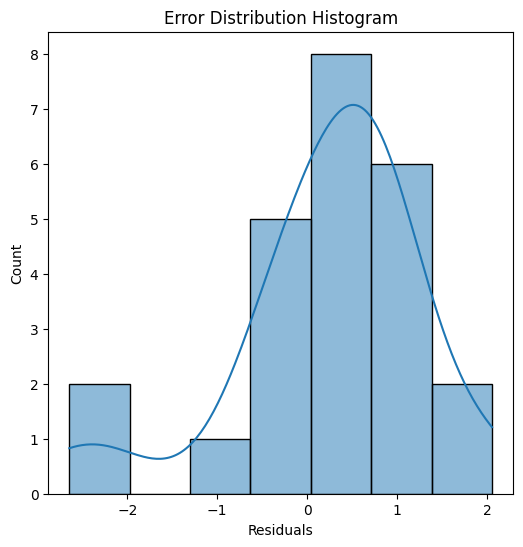

In [35]:
plot_model_evaluation(y_test, y_pred_lgbm)

### Feature importance

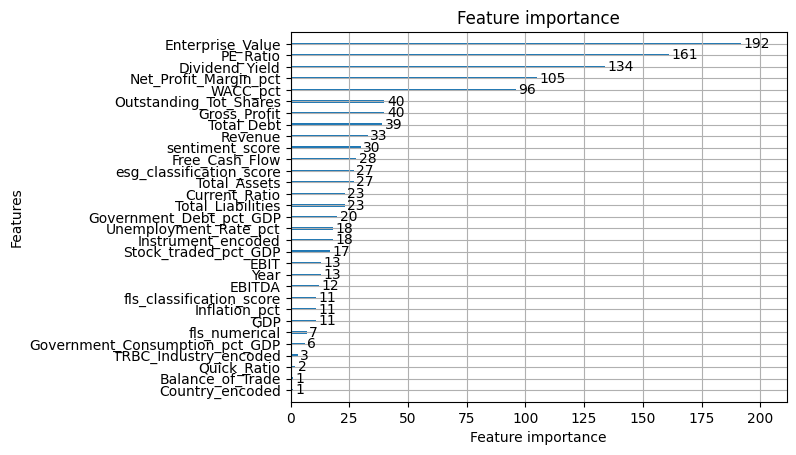

In [36]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# fit model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_encoded, y)

# Use lightgbm's built-in function to plot feature importance
lgb.plot_importance(lgb_model)
plt.show()

In [37]:
# Custom plot using plotly
# get importance
importance = lgb_model.feature_importances_

# create dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_encoded.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'})

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


In [87]:
import pandas as pd
import plotly.express as px

# get importance
importance = lgb_model.feature_importances_

# create dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_encoded.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'})

# Update the layout for white background and black axis lines only on x and y axes
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True, showgrid=False),
    yaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True, categoryorder='total ascending', showgrid=False),
    showlegend=True,
)

# Remove title
fig.update_layout(title=None)

fig.show()

In [38]:
import shap

# create a SHAP explainer object
explainer = shap.Explainer(lgb_model)

# compute SHAP values for the first example in the test set
X_example = X_encoded.iloc[0:1]  # or any other specific instance we're interested in
shap_values = explainer.shap_values(X_example)

# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_example)

## Catboost

Learning rate set to 0.034214
0:	learn: 6.8137844	total: 56.4ms	remaining: 56.3s
1:	learn: 6.7013830	total: 60.3ms	remaining: 30.1s
2:	learn: 6.5798903	total: 63.9ms	remaining: 21.2s
3:	learn: 6.4842547	total: 67.4ms	remaining: 16.8s
4:	learn: 6.3704405	total: 71ms	remaining: 14.1s
5:	learn: 6.2611434	total: 74.5ms	remaining: 12.3s
6:	learn: 6.1638995	total: 78ms	remaining: 11.1s
7:	learn: 6.0613108	total: 81.5ms	remaining: 10.1s
8:	learn: 5.9688237	total: 85.1ms	remaining: 9.37s
9:	learn: 5.8755302	total: 88.6ms	remaining: 8.77s
10:	learn: 5.7714547	total: 92.1ms	remaining: 8.28s
11:	learn: 5.6855921	total: 95.6ms	remaining: 7.87s
12:	learn: 5.5947367	total: 99ms	remaining: 7.52s
13:	learn: 5.5121432	total: 103ms	remaining: 7.22s
14:	learn: 5.4407526	total: 106ms	remaining: 6.96s
15:	learn: 5.3605395	total: 109ms	remaining: 6.72s
16:	learn: 5.2671973	total: 113ms	remaining: 6.52s
17:	learn: 5.1724528	total: 116ms	remaining: 6.34s
18:	learn: 5.0856339	total: 120ms	remaining: 6.18s
19:	

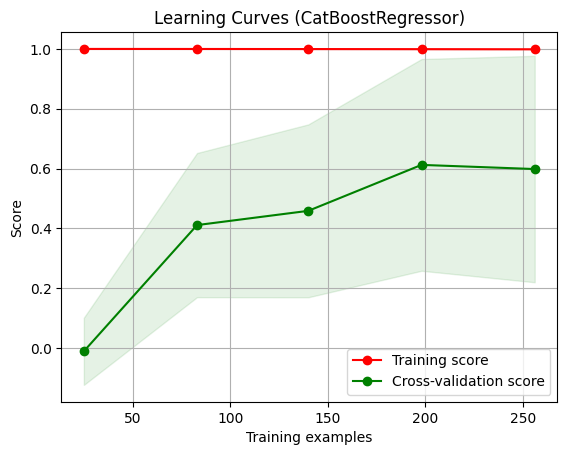

In [39]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Train the model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_encoded, y)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test_encoded)

# Calculate metrics
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_catboost))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_catboost))
print("The R^2 score on the test set: {:.4f}".format(r2_catboost))

# Plot learning curve
plot_learning_curve(catboost_model, "Learning Curves (CatBoostRegressor)", X, y, cv=5, n_jobs=4)
plt.show()

### Model evaluation plots

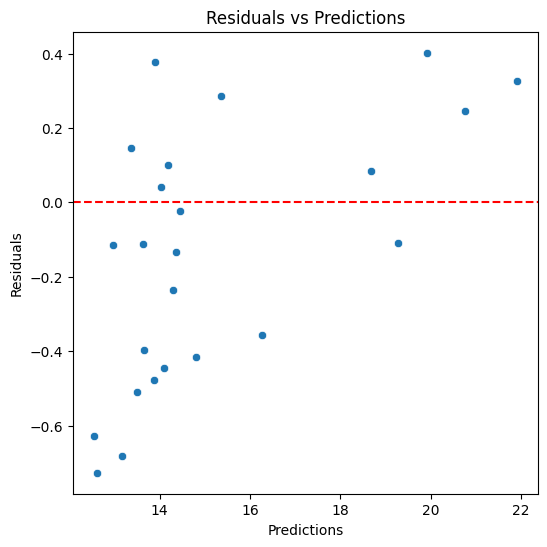

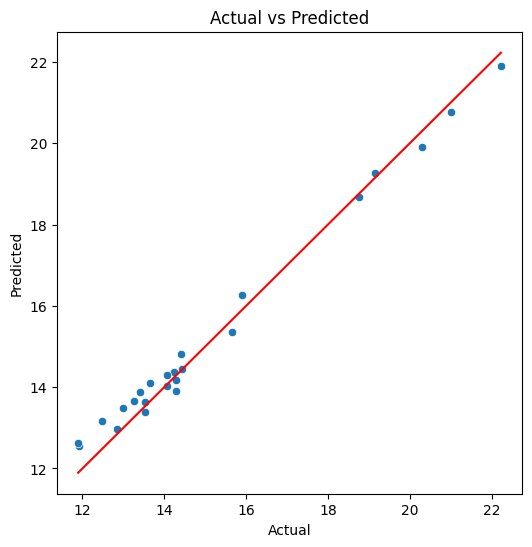

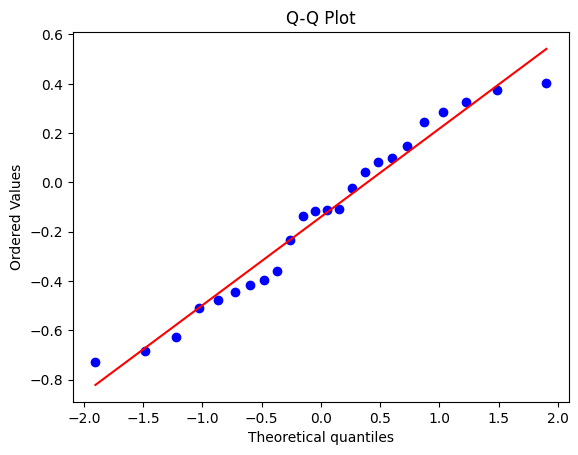

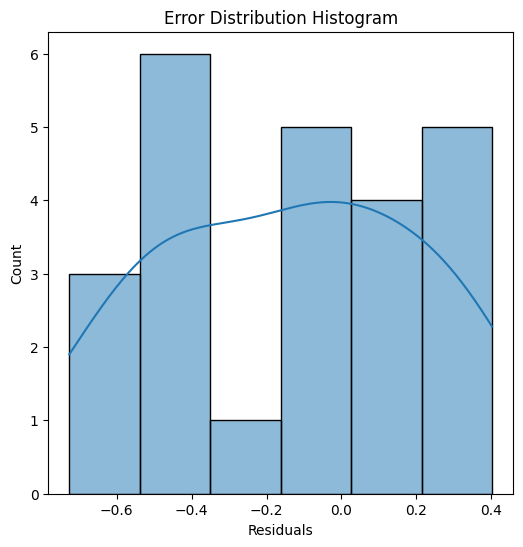

In [40]:
plot_model_evaluation(y_test, y_pred_catboost)

### Feature Importance

In [41]:
import catboost as cb
import plotly.express as px
import pandas as pd

# fit model
cb_model = cb.CatBoostRegressor()
cb_model.fit(X_encoded, y)

# get importance
importance = cb_model.get_feature_importance()

# create dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_encoded.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'})

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

Learning rate set to 0.034214
0:	learn: 6.8137844	total: 8.81ms	remaining: 8.8s
1:	learn: 6.7013830	total: 15.6ms	remaining: 7.78s
2:	learn: 6.5798903	total: 24.2ms	remaining: 8.04s
3:	learn: 6.4842547	total: 33.8ms	remaining: 8.41s
4:	learn: 6.3704405	total: 42.9ms	remaining: 8.53s
5:	learn: 6.2611434	total: 51.9ms	remaining: 8.6s
6:	learn: 6.1638995	total: 58.2ms	remaining: 8.26s
7:	learn: 6.0613108	total: 67.8ms	remaining: 8.4s
8:	learn: 5.9688237	total: 76.4ms	remaining: 8.41s
9:	learn: 5.8755302	total: 85.4ms	remaining: 8.45s
10:	learn: 5.7714547	total: 94.8ms	remaining: 8.53s
11:	learn: 5.6855921	total: 104ms	remaining: 8.59s
12:	learn: 5.5947367	total: 114ms	remaining: 8.63s
13:	learn: 5.5121432	total: 123ms	remaining: 8.67s
14:	learn: 5.4407526	total: 132ms	remaining: 8.64s
15:	learn: 5.3605395	total: 140ms	remaining: 8.64s
16:	learn: 5.2671973	total: 146ms	remaining: 8.46s
17:	learn: 5.1724528	total: 152ms	remaining: 8.3s
18:	learn: 5.0856339	total: 159ms	remaining: 8.23s
19:	

# Fine Tuning

In [42]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming we have our training data in X_train, y_train and testing data in X_test, y_test

# Train the model
lgbm_model = LGBMRegressor(objective ='regression')  # using regression as our objective function
lgbm_model.fit(X_encoded, y)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test_encoded)

# Calculate metrics
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_lgbm))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_lgbm))
print("The R^2 score on the test set: {:.4f}".format(r2_lgbm))

The mean squared error (MSE) on test set: 1.0788
The root mean squared error (RMSE) on test set: 1.0386
The R^2 score on the test set: 0.8698


## Grid Search

In [43]:
from lightgbm import LGBMRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, KFold

# Define parameter grid
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

# Create a base model
lgbm = LGBMRegressor()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
grid_search = HalvingGridSearchCV(estimator = lgbm, param_grid = param_grid,
                           cv = cv, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_encoded, y)

# Get the best parameters
best_params = grid_search.best_params_

n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 10
max_resources_: 321
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 10
Fitting 5 folds for each of 120 candidates, totalling 600 fits


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]


----------
iter: 1
n_candidates: 40
n_resources: 30
Fitting 5 folds for each of 40 candidates, totalling 200 fits


One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
    

----------
iter: 2
n_candidates: 14
n_resources: 90
Fitting 5 folds for each of 14 candidates, totalling 70 fits


One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
    

----------
iter: 3
n_candidates: 5
n_resources: 270
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
    

The mean squared error (MSE) on test set: 0.8969
The root mean squared error (RMSE) on test set: 0.9471
The R^2 score on the test set: 0.8917


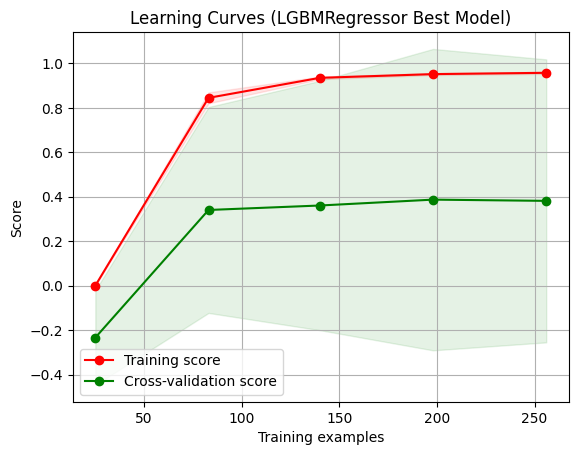

In [44]:
from lightgbm import LGBMRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

# Train the model using the best parameters
lgbm_best = LGBMRegressor(**best_params)
lgbm_best.fit(X_encoded, y)

# Make predictions on the test set using the best model
y_pred_lgbm_best = lgbm_best.predict(X_test_encoded)

# Calculate metrics
mse_lgbm_best = mean_squared_error(y_test, y_pred_lgbm_best)
rmse_lgbm_best = sqrt(mse_lgbm_best)
r2_lgbm_best = r2_score(y_test, y_pred_lgbm_best)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_lgbm_best))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_lgbm_best))
print("The R^2 score on the test set: {:.4f}".format(r2_lgbm_best))

# Plot learning curve
plot_learning_curve(lgbm_best, "Learning Curves (LGBMRegressor Best Model)", X, y, cv=5, n_jobs=4)
plt.show()


## many trials

In [45]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Define parameter grid
param_grid_focused = {
    'num_leaves': [30, 50, 70], # It will be good to experiment with this value around 50
    'min_data_in_leaf': [80, 100, 120], # As the HalvingGridSearchCV found a value of 100 to be optimal, we'll experiment around this value
    'lambda_l1': [0, 0.1, 0.2], # GridSearch found 0 to be optimal, but let's experiment around this value
    'lambda_l2': [0.8, 1, 1.2] # GridSearch found 1 to be optimal, but let's experiment around this value
}
# Create a base model
lgbm_model = lgb.LGBMRegressor()

# Manually create the splits in CV in order to be able to fix a random_state (HalvingGridSearchCV doesn't have that argument)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
halving_grid_search = HalvingGridSearchCV(estimator = lgbm_model, param_grid = param_grid_focused,
                           cv = cv, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
halving_grid_search.fit(X_encoded, y)

# Get the best parameters
best_params_focused = halving_grid_search.best_params_

n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 10
max_resources_: 321
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 81
n_resources: 10
Fitting 5 folds for each of 81 candidates, totalling 405 fits


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]


----------
iter: 1
n_candidates: 27
n_resources: 30
Fitting 5 folds for each of 27 candidates, totalling 135 fits


One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
    

----------
iter: 2
n_candidates: 9
n_resources: 90
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 3
n_resources: 270
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=0.8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8


One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
    

In [46]:
# Define parameter grid
param_grid_focused = {
    'num_leaves': [30, 50, 70],  # keeping this the same
    'min_data_in_leaf': [60, 70, 80],  # lowered the values
    'lambda_l1': [0, 0.1, 0.2],  # keeping this the same
    'lambda_l2': [0.6, 0.7, 0.8]  # lowered the values
}

# Manually create the splits in CV in order to be able to fix a random_state (HalvingGridSearchCV doesn't have that argument)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
halving_grid_search = HalvingGridSearchCV(estimator = lgbm_model, param_grid = param_grid_focused,
                           cv = cv, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
halving_grid_search.fit(X_encoded, y)

# Get the best parameters
best_params_focused = halving_grid_search.best_params_

n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 10
max_resources_: 321
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 81
n_resources: 10
Fitting 5 folds for each of 81 candidates, totalling 405 fits


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]


----------
iter: 1
n_candidates: 27
n_resources: 30
Fitting 5 folds for each of 27 candidates, totalling 135 fits


One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
    

----------
iter: 2
n_candidates: 9
n_resources: 90
Fitting 5 folds for each of 9 candidates, totalling 45 fits


One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
    

----------
iter: 3
n_candidates: 3
n_resources: 270
Fitting 5 folds for each of 3 candidates, totalling 15 fits


One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
    

In [47]:
print("Best Parameters: ", halving_grid_search.best_params_)
print("Best Score: ", halving_grid_search.best_score_)

Best Parameters:  {'lambda_l1': 0, 'lambda_l2': 0.6, 'min_data_in_leaf': 70, 'num_leaves': 30}
Best Score:  0.6555866653411211


# Source of Improvements

## Trasformations

In [48]:
 import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Pre-processed /sp500_trasformed.csv')
df = df.drop('Unnamed: 0', axis=1) #dropping the past index
df.head(5)

,Instrument_encoded,TRBC_Industry_encoded,Year,Quarter,Month_x,Month_y,Forward EV/EBITDA,Revenue,Gross Profit,EBIT,...,fls_numerical,fls_classification_score,GDP,Stock traded pct GDP,Inflation pct,Unemployment Rate pct,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP
0,-2.141308,0.136946,2.220446e-16,0.3887,0.432485,-0.394935,16.485255,22.678893,21.864862,21.337804,...,2.0,0.924926,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258
1,-2.141308,0.136946,2.220446e-16,0.3887,0.432485,-0.394935,14.936336,22.678893,21.864862,21.337804,...,2.0,0.924926,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258
2,1.579104,0.880180,2.220446e-16,0.3887,0.432485,-0.394935,14.009946,23.513409,22.756326,21.764869,...,2.0,0.930455,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258
3,1.579104,0.880180,2.220446e-16,0.3887,0.432485,-0.394935,14.009946,23.513409,22.756326,21.764869,...,2.0,0.930455,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258
4,1.579104,0.880180,2.220446e-16,0.3887,0.432485,-0.394935,14.009946,23.513409,22.756326,21.764869,...,2.0,0.951082,2.07802,1.748546,1.666255,-1.050052,-1.990493,-1.456665,0.212438,-2.311258


In [49]:
import pandas as pd
target = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_target_variables.csv')
#target = df.drop('Unnamed: 0', axis=1) #dropping the past index
target.head(5)

,Instrument,Forward Enterprise Value To EBITDA (Daily Time Series Ratio),Enterprise Value To EBITDA (Daily Time Series Ratio),EV / Free Cash Flow (SmartEstimate ®),P/E (Daily Time Series Ratio),Forward P/E (Daily Time Series Ratio)
0,POOL.OQ,15.585242,16.200543,31.632597,20.229126,21.400266
1,POOL.OQ,15.366744,15.973329,31.188947,19.917965,21.073564
2,POOL.OQ,15.453976,16.153896,31.541516,20.165245,21.081195
3,POOL.OQ,15.056633,15.738591,30.730606,19.596499,20.488317
4,POOL.OQ,14.846725,15.519277,30.302381,19.296156,20.179335


In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Instantiate the IterativeImputer
imputer = IterativeImputer()
cols_to_impute = target.columns.drop('Instrument')
target[cols_to_impute] = imputer.fit_transform(target[cols_to_impute])

# Separate input features and target variable
X = df.drop('Forward EV/EBITDA', axis=1) # drop the target variable and the date from the input features
y = target['EV / Free Cash Flow (SmartEstimate ®)']

# Align the number of samples in X and y
n_samples = min(X.shape[0], y.shape[0])
X = X[:n_samples]
y = y[:n_samples]

# Verify the updated shapes
print(X.shape)
print(y.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the XGBRegressor model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)#
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("The mean squared error (MSE) on test set (XGBRegressor): {:.4f}".format(mse_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("The R^2 score on the test set (XGBRegressor): {:.4f}".format(r2_xgb))


from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
print("The mean squared error (MSE) on test set (AdaBoostRegressor): {:.4f}".format(mse_adaboost))
rmse_adaboost = sqrt(mse_adaboost)
print("The root mean squared error (RMSE) on test set (AdaBoostRegressor): {:.4f}".format(rmse_adaboost))
r2_adaboost = r2_score(y_test, y_pred_adaboost)
print("The R^2 score on the test set (AdaBoostRegressor): {:.4f}".format(r2_adaboost))


from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

histgb = HistGradientBoostingRegressor()
histgb.fit(X_train, y_train)
y_pred_histgb = histgb.predict(X_test)
mse_histgb = mean_squared_error(y_test, y_pred_histgb)
rmse_histgb = sqrt(mse_histgb)
r2_histgb = r2_score(y_test, y_pred_histgb)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_histgb))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_histgb))
print("The R^2 score on the test set: {:.4f}".format(r2_histgb))

[IterativeImputer] Early stopping criterion not reached.


(5558, 39)
(5558,)
The mean squared error (MSE) on test set (XGBRegressor): 104.3473
The R^2 score on the test set (XGBRegressor): 0.7986
The mean squared error (MSE) on test set (AdaBoostRegressor): 218.8748
The root mean squared error (RMSE) on test set (AdaBoostRegressor): 14.7944
The R^2 score on the test set (AdaBoostRegressor): 0.5775
The mean squared error (MSE) on test set: 73.3153
The root mean squared error (RMSE) on test set: 8.5624
The R^2 score on the test set: 0.8585


# Exploring the predictions

**BEFORE RUNNING THIS SECTION, PLEASE RE-RUN MODELLING, SPLITTING X AND Y, SPLIT IN TRAIN AND TEST**



Learning rate set to 0.034214
0:	learn: 6.8137844	total: 7.07ms	remaining: 7.06s
1:	learn: 6.7013830	total: 16.2ms	remaining: 8.06s
2:	learn: 6.5798903	total: 30.1ms	remaining: 10s
3:	learn: 6.4842547	total: 38.1ms	remaining: 9.48s
4:	learn: 6.3704405	total: 44.8ms	remaining: 8.91s
5:	learn: 6.2611434	total: 57.7ms	remaining: 9.56s
6:	learn: 6.1638995	total: 64.6ms	remaining: 9.17s
7:	learn: 6.0613108	total: 78.2ms	remaining: 9.69s
8:	learn: 5.9688237	total: 85.2ms	remaining: 9.38s
9:	learn: 5.8755302	total: 101ms	remaining: 9.97s
10:	learn: 5.7714547	total: 114ms	remaining: 10.2s
11:	learn: 5.6855921	total: 121ms	remaining: 9.97s
12:	learn: 5.5947367	total: 137ms	remaining: 10.4s
13:	learn: 5.5121432	total: 144ms	remaining: 10.1s
14:	learn: 5.4407526	total: 150ms	remaining: 9.87s
15:	learn: 5.3605395	total: 161ms	remaining: 9.89s
16:	learn: 5.2671973	total: 172ms	remaining: 9.97s
17:	learn: 5.1724528	total: 181ms	remaining: 9.88s
18:	learn: 5.0856339	total: 193ms	remaining: 9.99s
19:	

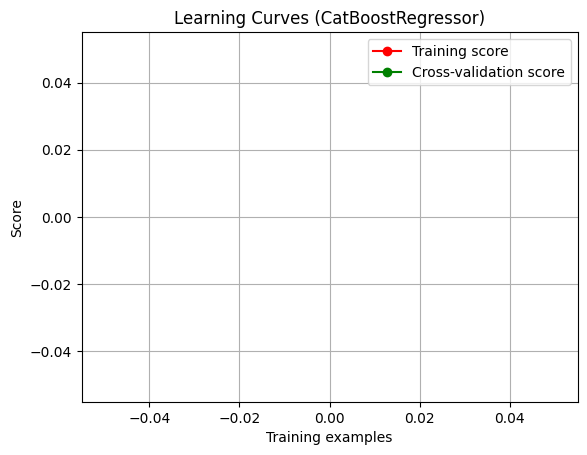

In [61]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Train the model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_encoded, y)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test_encoded)

# Calculate metrics
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_catboost))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_catboost))
print("The R^2 score on the test set: {:.4f}".format(r2_catboost))

# Plot learning curve
plot_learning_curve(catboost_model, "Learning Curves (CatBoostRegressor)", X, y, cv=5, n_jobs=4)
plt.show()

In [62]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Train the model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_encoded, y)


# Predict with the model on the training group
y_pred_train_catboost = catboost_model.predict(X_encoded)

# Calculate metrics
mse_catboost = mean_squared_error(y, y_pred_train_catboost)
rmse_catboost = sqrt(mse_catboost)
r2_catboost = r2_score(y, y_pred_train_catboost)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_catboost))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_catboost))
print("The R^2 score on the test set: {:.4f}".format(r2_catboost))

Learning rate set to 0.034214
0:	learn: 6.8137844	total: 4.42ms	remaining: 4.42s
1:	learn: 6.7013830	total: 7.99ms	remaining: 3.99s
2:	learn: 6.5798903	total: 11.5ms	remaining: 3.82s
3:	learn: 6.4842547	total: 15.2ms	remaining: 3.78s
4:	learn: 6.3704405	total: 18.6ms	remaining: 3.71s
5:	learn: 6.2611434	total: 22.2ms	remaining: 3.67s
6:	learn: 6.1638995	total: 25.6ms	remaining: 3.64s
7:	learn: 6.0613108	total: 29.1ms	remaining: 3.61s
8:	learn: 5.9688237	total: 32.6ms	remaining: 3.59s
9:	learn: 5.8755302	total: 36ms	remaining: 3.56s
10:	learn: 5.7714547	total: 39.4ms	remaining: 3.54s
11:	learn: 5.6855921	total: 42.7ms	remaining: 3.51s
12:	learn: 5.5947367	total: 46.1ms	remaining: 3.5s
13:	learn: 5.5121432	total: 49.7ms	remaining: 3.5s
14:	learn: 5.4407526	total: 52.9ms	remaining: 3.48s
15:	learn: 5.3605395	total: 56.3ms	remaining: 3.46s
16:	learn: 5.2671973	total: 59.6ms	remaining: 3.45s
17:	learn: 5.1724528	total: 63ms	remaining: 3.43s
18:	learn: 5.0856339	total: 66.3ms	remaining: 3.42

### Discount: LSEG

In [63]:
result = X_test.copy()
result['actual ev/ebitda'] = result['Enterprise Value'] / result['EBITDA']

In [64]:
df = pd.DataFrame()
df['Instrument'] = result['Instrument']
df['predictions'] = y_pred_catboost
df['actual'] = result['actual ev/ebitda']
df['Year'] = result['Year']
df['Month'] = result['Month']
df['percentage'] = (df['predictions'] - df['actual']) / df['actual']

In [65]:
df

,Instrument,predictions,actual,Year,Month,percentage
0,LSEG.L,12.967896,14.424258,2022.0,12.0,-0.100966
1,LSEG.L,12.549695,13.363366,2022.0,12.0,-0.060888
2,LSEG.L,13.494176,17.037570,2021.0,12.0,-0.207975
3,LSEG.L,14.098971,17.065006,2021.0,12.0,-0.173808
4,LSEG.L,14.372256,17.696367,2021.0,12.0,-0.187841
5,LSEG.L,13.659879,15.721900,2021.0,12.0,-0.131156
6,LSEG.L,14.457109,42.872370,2020.0,12.0,-0.662787
7,LSEG.L,13.875300,39.341937,2020.0,12.0,-0.647315
8,LSEG.L,12.622045,34.249936,2020.0,12.0,-0.631472
9,LSEG.L,16.261717,25.745614,2019.0,12.0,-0.368369


In [66]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
column_average = df['percentage'].mean()
print("The discount predicted by the models is : {:.4f}".format(column_average))

The discount predicted by the models is : -0.2291


The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


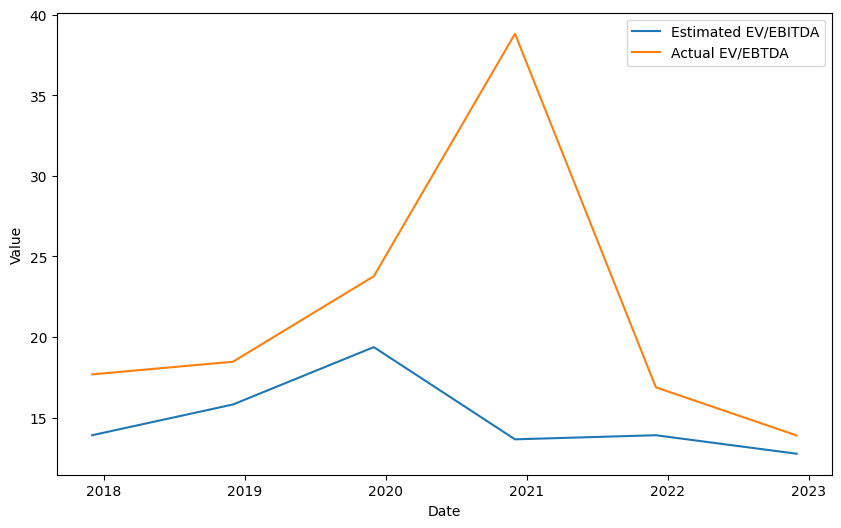

In [67]:
# Assuming your DataFrame is called df

df_grouped = df.groupby(['Year', 'Month']).mean().reset_index()

# If you want to keep the 'Year' and 'Month' columns in the final DataFrame
df_grouped['Date'] = pd.to_datetime(df_grouped[['Year', 'Month']].assign(DAY=1))

df_grouped = df_grouped.sort_values('Date')  # Sorts the data by date

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Date'], df_grouped['predictions'], label='Estimated EV/EBITDA')
plt.plot(df_grouped['Date'], df_grouped['actual'], label='Actual EV/EBTDA')
plt.xlabel('Date')
plt.ylabel('Value')
#plt.title('Predictions vs Actual Over Time')
plt.legend()
plt.show()

In [68]:
df_grouped

,Year,Month,predictions,actual,percentage,Date
0,2017.0,12.0,13.907213,17.682315,-0.212758,2017-12-01
1,2018.0,12.0,15.813699,18.466926,-0.132176,2018-12-01
2,2019.0,12.0,19.373911,23.771121,-0.177828,2019-12-01
3,2020.0,12.0,13.651484,38.821414,-0.647192,2020-12-01
4,2021.0,12.0,13.906320,16.880211,-0.175195,2021-12-01
5,2022.0,12.0,12.758796,13.893812,-0.080927,2022-12-01


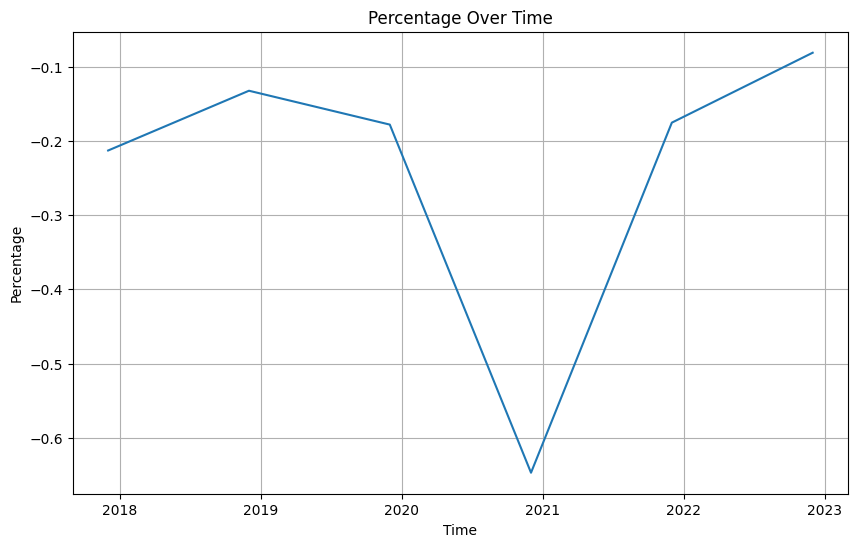

In [69]:
plt.figure(figsize=(10,6))
plt.plot(df_grouped['Date'], df_grouped['percentage'])
plt.title('Percentage Over Time')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

### Peers

In [70]:
# Create a DataFrame for the training group
df_train = pd.DataFrame()
df_train['Instrument'] = X['Instrument']
df_train['predictions'] = y_pred_train_catboost
df_train['actual'] = y
df_train['percentage'] = (df_train['predictions'] - df_train['actual']) / df_train['actual']

# Assuming you have 'Year' and 'Month' information for the training group as well
df_train['Year'] = X_encoded['Year']
df_train['Month'] = X_encoded['Month']
df_train

,Instrument,predictions,actual,percentage,Year,Month
0,LSEG.L,12.651841,12.853784,-0.015711,2022.0,12.0
1,LSEG.L,12.176731,11.922475,0.021326,2022.0,12.0
2,LSEG.L,13.149113,12.985009,0.012638,2021.0,12.0
3,LSEG.L,13.787189,13.653722,0.009775,2021.0,12.0
4,LSEG.L,14.049643,14.237961,-0.013226,2021.0,12.0
...,...,...,...,...,...,...
316,DB1GnEUR.xbo,11.567204,11.069644,0.044948,2018.0,12.0
317,DB1GnEUR.xbo,11.691010,11.752538,-0.005235,2018.0,12.0
318,DB1GnEUR.xbo,13.693051,13.549748,0.010576,2017.0,12.0
319,DB1GnEUR.xbo,13.303633,13.208437,0.007207,2017.0,12.0


In [71]:
import pandas as pd
import plotly.graph_objects as go

# Group by instrument and year and calculate the mean of percentage
grouped_data = df_train.groupby(['Instrument', 'Year']).mean().reset_index()

# Color mapping
color_mapping = {
    'LSEG.L': 'red',
    'MCO': 'blue',
    'MORN.O': 'blue',
    'SPGI.K': 'blue',
    'MSCI.K': 'blue',
    'VRSK.O': 'blue',
    'FDS': 'blue',
    'ICE': 'green',
    'NDAQ.O': 'green',
    'EEFT.O': 'green',
    'CME.O': 'green',
    'CBOE.K': 'green',
    '0388.HK': 'green',
    'DB1GnEUR.xbo': 'green',
    'MKTX.O': 'green'
}

# Generate a sorted list of unique instruments for colour consistency
instruments = sorted(grouped_data['Instrument'].unique())

# Initialize the figure
fig = go.Figure()

# For each unique instrument, create a line in the plot
for instrument in instruments:
    instrument_data = grouped_data[grouped_data['Instrument'] == instrument]

    fig.add_trace(go.Scatter(x=instrument_data['Year'],
                             y=instrument_data['percentage'],
                             mode='lines',
                             name=instrument,
                             line=dict(color=color_mapping.get(instrument, 'black'))))

fig.update_layout(
    title='Instrument premium/discount Over Time',
    xaxis_title='Year',
    yaxis_title='Average Prediction Percentage',
    legend_title='Instrument',
)

In [81]:
import pandas as pd
import plotly.graph_objects as go

# Group by instrument and year and calculate the mean of percentage
grouped_data = df_train.groupby(['Instrument', 'Year']).mean().reset_index()

# Color mapping
color_mapping = {
    'LSEG.L': 'red',
    'MCO': 'blue',
    'MORN.O': 'blue',
    'SPGI.K': 'blue',
    'MSCI.K': 'blue',
    'VRSK.O': 'blue',
    'FDS': 'blue',
    'ICE': 'green',
    'NDAQ.O': 'green',
    'EEFT.O': 'green',
    'CME.O': 'green',
    'CBOE.K': 'green',
    '0388.HK': 'green',
    'DB1GnEUR.xbo': 'green',
    'MKTX.O': 'green'
}

# Generate a sorted list of unique instruments for colour consistency
instruments = sorted(grouped_data['Instrument'].unique())

# Initialize the figure
fig = go.Figure()

# For each unique instrument, create a line in the plot
for instrument in instruments:
    instrument_data = grouped_data[grouped_data['Instrument'] == instrument]

    if instrument == "LSEG.L":
        fig.add_trace(go.Scatter(x=instrument_data['Year'],
                                 y=instrument_data['percentage'],
                                 mode='lines',
                                 name=instrument,
                                 line=dict(color=color_mapping.get(instrument, 'black'), width=3)))
    else:
        fig.add_trace(go.Scatter(x=instrument_data['Year'],
                                 y=instrument_data['percentage'],
                                 mode='lines',
                                 name=instrument,
                                 line=dict(color=color_mapping.get(instrument, 'black'), width=1, dash='dot')))

fig.update_layout(
    title='Instrument premium/discount Over Time',
    xaxis_title='Year',
    yaxis_title='Average Prediction Percentage',
    legend_title='Instrument',
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(showgrid=False, showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(showgrid=False, showline=True, linewidth=2, linecolor='black', mirror=True)
)

fig.show()

In [72]:
import pandas as pd
import plotly.express as px

# Filter df_train for the year 2022
df_train_2022 = df_train[df_train['Year'] == 2022]

# Color mapping
color_mapping = {
    'LSEG.L': 'red',
    'MCO': 'blue',
    'MORN.O': 'blue',
    'SPGI.K': 'blue',
    'MSCI.K': 'blue',
    'VRSK.O': 'blue',
    'FDS': 'blue',
    'ICE': 'green',
    'NDAQ.O': 'green',
    'EEFT.O': 'green',
    'CME.O': 'green',
    'CBOE.K': 'green',
    '0388.HK': 'green',
    'DB1GnEUR.xbo': 'green',
    'MKTX.O': 'green'
}

# Map the color column based on color_mapping
df_train_2022['color'] = df_train_2022['Instrument'].map(color_mapping)

# Create category mapping for the legend
category_mapping = {
    'red': 'LSEG',
    'blue': 'Data Players',
    'green': 'Exchange Providers'
}

# Map the category column based on category_mapping
df_train_2022['category'] = df_train_2022['color'].map(category_mapping)

fig = px.scatter(df_train_2022, x='percentage', y='actual', color='category',
                 color_discrete_map=category_mapping,
                 trendline='ols', hover_data=['Instrument'])

fig.update_layout(title='Valuation (EV/EBITDA) vs YoY Growth for 2022',
                  xaxis_title='Year over Year Growth (percentage)',
                  yaxis_title='Valuation (EV/EBITDA)')

fig.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [73]:
import pandas as pd
import plotly.subplots as sp
from plotly.offline import iplot

# Filter df_train for the specified years
years = [2019, 2020, 2021, 2022]
df_train_years = df_train[df_train['Year'].isin(years)]

# Create a subplot, with 1 row and 4 columns (for 4 years)
fig = sp.make_subplots(rows=1, cols=4, subplot_titles=[str(year) for year in years], shared_yaxes=True)

# Loop over each year and add a scatter plot to the subplot
for i, year in enumerate(years, 1):
    df_train_year = df_train_years[df_train_years['Year'] == year]

    # Map the color and category columns based on color_mapping and category_mapping
    df_train_year['color'] = df_train_year['Instrument'].map(color_mapping)
    df_train_year['category'] = df_train_year['color'].map(category_mapping)

    # Create the scatter plot
    fig_year = px.scatter(df_train_year, x='percentage', y='actual', color='category',
                          color_discrete_map=category_mapping, hover_data=['Instrument'])

    # Add each trace (scatter plot) to the subplot
    for trace in fig_year.data:
        fig.add_trace(trace, row=1, col=i)

# Update layout
fig.update_layout(title='Valuation (EV/EBITDA) vs YoY Growth for 2019-2022',
                  xaxis_title='Year over Year Growth (percentage)',
                  yaxis_title='Valuation (EV/EBITDA)')

iplot(fig)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [83]:
import pandas as pd
import plotly.subplots as sp
from plotly.offline import iplot

# Filter df_train for the specified years
years = [2019, 2020, 2021, 2022]
df_train_years = df_train[df_train['Year'].isin(years)]

# Create a subplot with 2 rows and 2 columns
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=[str(year) for year in years], shared_yaxes=True)

# Loop over each year and add a scatter plot to the subplot
for index, year in enumerate(years):
    row = 1 if index < 2 else 2
    col = 1 if index % 2 == 0 else 2

    df_train_year = df_train_years[df_train_years['Year'] == year]

    # Map the color and category columns based on color_mapping and category_mapping
    df_train_year['color'] = df_train_year['Instrument'].map(color_mapping)
    df_train_year['category'] = df_train_year['color'].map(category_mapping)

    # Create the scatter plot
    fig_year = px.scatter(df_train_year, x='percentage', y='actual', color='category',
                          color_discrete_map=category_mapping, hover_data=['Instrument'])

    # Add each trace (scatter plot) to the subplot
    for trace in fig_year.data:
        fig.add_trace(trace, row=row, col=col)

    # Ensure that only the legend from the first subplot is shown
    if index > 0:
        for trace in fig.data[-len(fig_year.data):]:
            trace.showlegend = False

# Update layout
fig.update_layout(
    title='Valuation (EV/EBITDA) vs YoY Growth for 2019-2022',
    paper_bgcolor='white',
    plot_bgcolor='white',
)

# Update x and y axes for each subplot
for axis in ['xaxis', 'xaxis2', 'xaxis3', 'xaxis4', 'yaxis', 'yaxis2', 'yaxis3', 'yaxis4']:
    fig['layout'][axis].update(
        showgrid=True,
        gridcolor='lightgray',
        showline=True,
        linewidth=2,
        linecolor='black',
        mirror=True
    )

iplot(fig)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [74]:
import pandas as pd
import plotly.express as px

# Filter df_train for the year 2022
df_train_2022 = df_train[df_train['Year'] == 2022]

# Color mapping
color_mapping = {
    'LSEG.L': 'red',
    'MCO': 'blue',
    'MORN.O': 'blue',
    'SPGI.K': 'blue',
    'MSCI.K': 'blue',
    'VRSK.O': 'blue',
    'FDS': 'blue',
    'ICE': 'green',
    'NDAQ.O': 'green',
    'EEFT.O': 'green',
    'CME.O': 'green',
    'CBOE.K': 'green',
    '0388.HK': 'green',
    'DB1GnEUR.xbo': 'green',
    'MKTX.O': 'green'
}

# Map the color column based on color_mapping
df_train_2022['color'] = df_train_2022['Instrument'].map(color_mapping)

# Create category mapping for the legend
category_mapping = {
    'red': 'LSEG',
    'blue': 'Data Players',
    'green': 'Exchange Providers'
}

# Map the category column based on category_mapping
df_train_2022['category'] = df_train_2022['color'].map(category_mapping)

fig = px.scatter(df_train_2022, x='percentage', y='actual', color='category',
                 color_discrete_map=category_mapping,
                 trendline='ols', hover_data=['Instrument'])

fig.update_layout(title='Valuation (EV/EBITDA) vs YoY Growth for 2022',
                  xaxis_title='Year over Year Growth (percentage)',
                  yaxis_title='Valuation (EV/EBITDA)')

fig.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [75]:
import plotly.express as px
from sklearn.linear_model import LinearRegression

def scatter_plot(df):
    # Create scatter plot
    fig = px.scatter(df, x='Year', y='percentage', color='Instrument',
                     labels={'Year': 'Year', 'percentage': 'Percentage'},
                     title='Instrument Predictions Over Time')

    # Add text annotations
    for i, instrument in df.iterrows():
        if pd.notnull(df.loc[i, 'Year']) and pd.notnull(df.loc[i, 'percentage']):
            fig.add_annotation(x=df.loc[i, 'Year'], y=df.loc[i, 'percentage'],
                               text=df.loc[i, 'Instrument'], showarrow=False, font=dict(size=8))

    # Linear regression per instrument
    instruments = df['Instrument'].unique()
    for instrument in instruments:
        instrument_data = df[df['Instrument'] == instrument]
        X, Y = instrument_data['Year'].values.reshape(-1,1), instrument_data['percentage'].values.reshape(-1,1)
        reg_line = LinearRegression().fit(X, Y).predict(X)
        fig.add_trace(go.Scatter(x=instrument_data['Year'],
                                 y=reg_line.flatten(),
                                 mode='lines',
                                 name=f'{instrument} Linear Regression',
                                 line=dict(dash='dash')))

    # Show the plot
    fig.show()

In [76]:
df_train

,Instrument,predictions,actual,percentage,Year,Month
0,LSEG.L,12.651841,12.853784,-0.015711,2022.0,12.0
1,LSEG.L,12.176731,11.922475,0.021326,2022.0,12.0
2,LSEG.L,13.149113,12.985009,0.012638,2021.0,12.0
3,LSEG.L,13.787189,13.653722,0.009775,2021.0,12.0
4,LSEG.L,14.049643,14.237961,-0.013226,2021.0,12.0
...,...,...,...,...,...,...
316,DB1GnEUR.xbo,11.567204,11.069644,0.044948,2018.0,12.0
317,DB1GnEUR.xbo,11.691010,11.752538,-0.005235,2018.0,12.0
318,DB1GnEUR.xbo,13.693051,13.549748,0.010576,2017.0,12.0
319,DB1GnEUR.xbo,13.303633,13.208437,0.007207,2017.0,12.0
